# That Long Winding Road
**Analysing Traffic Indicators on the I-94**

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 The Spread](#3)
- [4 Day or Night Traffic is a Fright..](#4)
- [5 Its That Time of the Month..](#5)
- [6 Its That Time of the Week](#6)
- [7 Cold or Sunny Traffic isn't Funny](#7)
- [8 Something About July...](#8)
- [9 Conclusion](#9)

# 1

## Introduction

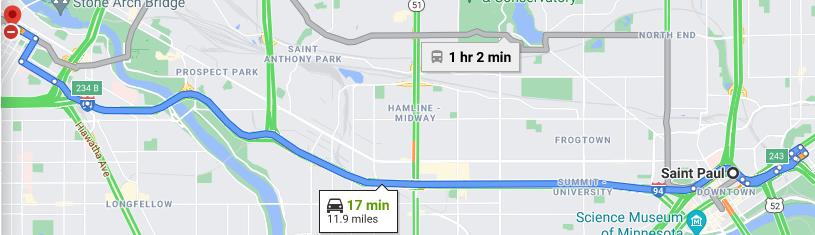

The [I-94](https://en.wikipedia.org/wiki/Interstate_94) is an interstate highway connecting the Great Lakes and northern Great Plains regions of Minnesota, USA. John Hogue has provided a data set that carries data associated to westbound traffic on the I-94.

The data was collected from a station that is located approximately between Minneapolis and Saint Paul by counting the number of cars that crossed the point.

In this project, the goal would would be to:
- Analyze the dataset
- Identify a few indicators of heavy traffic on the I-94 e.g. weather type, time of the day etc.

It must be noted that whatever findings are revealed through this study are focused on only the west bound traffic and not the entire highway traffic.

[Index](#Index)

# 2

## Reading the Data

The data for this project as mentioned earlier was provided by John Hogue and has been downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The data dictionary for the dataset has been taken from the above link and presented below:
- *holiday* - Categorical US National holidays plus regional holiday, Minnesota State Fair
- *temp* - Numeric Average temp in kelvin
- *rain_1h* - Numeric Amount in mm of rain that occurred in the hour
- *snow_1h* - Numeric Amount in mm of snow that occurred in the hour
- *clouds_all* - Numeric Percentage of cloud cover
- *weather_main* - Categorical Short textual description of the current weather
- *weather_description* - Categorical Longer textual description of the current weather
- *date_time* - DateTime Hour of the data collected in local CST time
- *traffic_volume* - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Below we shall read the dataset into a dataframe.

In [1]:
import pandas as pd
traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


An analysis of the datatypes and values of the dataset has been provided below.

In [2]:
def bold_print(a_string):
    """
    Boldens the output
    
    Args:
        a_string (string): String to be bolded
    """
    print("\033[1m"+a_string+"\033[0m"+'\n')

In [3]:
bold_print("Deeper analysis of each column")
print(traffic_data.info())

Deeper analysis of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


An initial analysis reveals that the dataset does not seem to be having any missing data. In addition the makeup of the data types are mostly string and float.

[Index](#Index)

# 3

## The Spread
**Analysing the Traffic Volume**

We begin the analysis by verifying what the traffic counts look like. This should help is to get a better understanding of the spread.

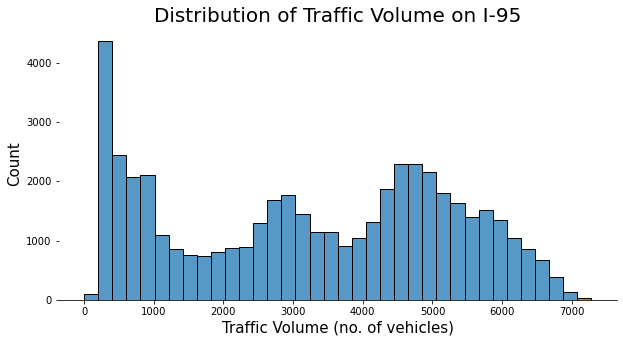

In [4]:
#Plot a histogram of the traffic spread for the whole data set
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,5))
sns.histplot(data = traffic_data, x = 'traffic_volume')
sns.despine(left = True)
plt.title(label = "Distribution of Traffic Volume on I-95", 
          fontsize = 20)
plt.xlabel("Traffic Volume (no. of vehicles)", size = 15)
plt.ylabel("Count",size = 15)
plt.show()

In [5]:
traffic_data["traffic_volume"].describe().map('{:,.2f}'.format)

count    48,204.00
mean      3,259.82
std       1,986.86
min           0.00
25%       1,193.00
50%       3,380.00
75%       4,933.00
max       7,280.00
Name: traffic_volume, dtype: object

25% of the values are less 1,193 and 75% of the traffic volume is less than 4933. The pattern of traffic distribution is not even.

Next we shall verify whether the weather has an influence on traffic.

[Index](#Index)

# 4

## Day or Night, Traffic is a Fright...
**Understanding Traffic Trends during Days and Nights**

Since we have a column that refers to time, it would be best to go over the traffic trends during the day times and night times. Surely due to work engagements during the day, it it most likely that the traffic feed will be high. We could verify these trends by dividing the data set based on day time traffic and night time traffic.

Day time traffic will be defined as traffic between the hours of 7AM-7PM. Night time traffic follows on from 7PM-7AM.

In [6]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

#Filter day time traffic
daytime_data = traffic_data[traffic_data['date_time'].dt.hour.between(7,18)].copy() #Set with copy to prevent SettingwithCopy warning

#Filter night time traffic
nightime_data_1 = traffic_data[traffic_data['date_time'].dt.hour.between(19,23)].copy() #Between 7PM-11PM
nightime_data_2 = traffic_data[traffic_data['date_time'].dt.hour.between(0,6)].copy() #Between 12AM-6AM
nightime_data = pd.concat([nightime_data_1,nightime_data_2])

In [7]:
bold_print("Number of rows associated to day time data:")
daytime_data.shape[0]

Number of rows associated to day time data:



23877

In [8]:
bold_print("Number of rows associated to night time data:")
nightime_data.shape[0]

Number of rows associated to night time data:



24327

There **seems to be missing data**. There is a mismatch between the number of rows associated to day time and night time data.
We need to investigate this further.

In [9]:
bold_print("Sample of date-time data for two days")
traffic_data.loc[:34,'date_time']

Sample of date-time data for two days



0    2012-10-02 09:00:00
1    2012-10-02 10:00:00
2    2012-10-02 11:00:00
3    2012-10-02 12:00:00
4    2012-10-02 13:00:00
5    2012-10-02 14:00:00
6    2012-10-02 15:00:00
7    2012-10-02 16:00:00
8    2012-10-02 17:00:00
9    2012-10-02 18:00:00
10   2012-10-02 19:00:00
11   2012-10-02 20:00:00
12   2012-10-02 21:00:00
13   2012-10-02 22:00:00
14   2012-10-02 23:00:00
15   2012-10-03 00:00:00
16   2012-10-03 01:00:00
17   2012-10-03 02:00:00
18   2012-10-03 03:00:00
19   2012-10-03 04:00:00
20   2012-10-03 05:00:00
21   2012-10-03 06:00:00
22   2012-10-03 08:00:00
23   2012-10-03 09:00:00
24   2012-10-03 12:00:00
25   2012-10-03 13:00:00
26   2012-10-03 14:00:00
27   2012-10-03 15:00:00
28   2012-10-03 16:00:00
29   2012-10-03 18:00:00
30   2012-10-03 19:00:00
31   2012-10-03 20:00:00
32   2012-10-03 21:00:00
33   2012-10-03 22:00:00
34   2012-10-03 23:00:00
Name: date_time, dtype: datetime64[ns]

On verifying a couple of rows of the data,as seen above, it was found that **there are multiple instances of missing data**. In the above example, on the 3rd Oct 2012 there is no account for the data at 7:00 AM, 10:00 AM and 11:00 AM. In the same light, data is missing for the hours between 6:00 AM - 8:00 AM for the 2nd Oct 2012.

Based on the available data we can verify the volume of traffic during the day and night.

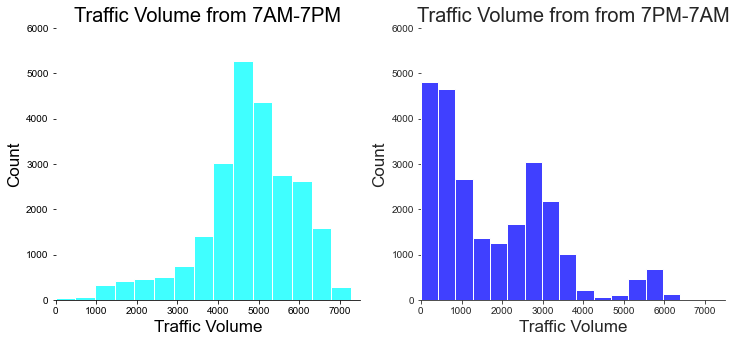

In [10]:
#Defining the size of the figure
fig = plt.figure(figsize=(12,5))

#Plotting histogram for day time traffic
plt.subplot(1,2,1)
sns.set_style("ticks")
sns.histplot(data = daytime_data, x = 'traffic_volume', bins = 15, color = 'cyan')
sns.despine(left = True)
plt.title("Traffic Volume from 7AM-7PM", size = 20)
plt.xlabel("Traffic Volume", size = 17)
plt.ylabel("Count",size = 17)
plt.xlim(0, 7500)
plt.ylim(0,6000)

#Plotting histogram for night time traffic
plt.subplot(1,2,2)
sns.set_style("ticks")
sns.histplot(data = nightime_data, x = 'traffic_volume',bins=15, color = 'blue')
sns.despine(left = True)
plt.title("Traffic Volume from from 7PM-7AM", size = 20)
plt.xlabel("Traffic Volume", size = 17)
plt.ylabel("Count",size = 17)
plt.xlim(0, 7500)
plt.ylim(0,6000)

plt.show()

In [11]:
bold_print("Statistical data: Day time traffic volume")
daytime_data['traffic_volume'].describe().map('{:,.2f}'.format)

Statistical data: Day time traffic volume



count    23,877.00
mean      4,762.05
std       1,174.55
min           0.00
25%       4,252.00
50%       4,820.00
75%       5,559.00
max       7,280.00
Name: traffic_volume, dtype: object

In [12]:
bold_print("Statistical date: Night time traffic volume")
nightime_data['traffic_volume'].describe()

Statistical date: Night time traffic volume



count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Day time traffic seems to be left skewed while night time traffic is right skewed.

It is clear from the above histogram that **day time traffic is indeed significantly higher than night time traffic**. However, this does not reveal how day time and night time traffic is distributed.

We shall analyse how the volume of traffic is distributed through the course of day and night.

[Index](#Index)

# 5

## Its That Time of the Month...
**Traffic Volume over Months**

Earlier we analysed the spread of traffic. Now we shall analyse how day time and night time traffic is affected over the months. We shall try and analyse whether there is a change in traffic volume as the months change for both day and night time traffic.

In [13]:
#Create a column to identify the month in each traffic record
daytime_data['month'] = daytime_data['date_time'].dt.month
nightime_data['month'] = nightime_data['date_time'].dt.month

#Group the day and night traffic data by month
by_month_day = daytime_data.groupby('month').mean().round(2)
by_month_night = nightime_data.groupby('month').mean().round(2)

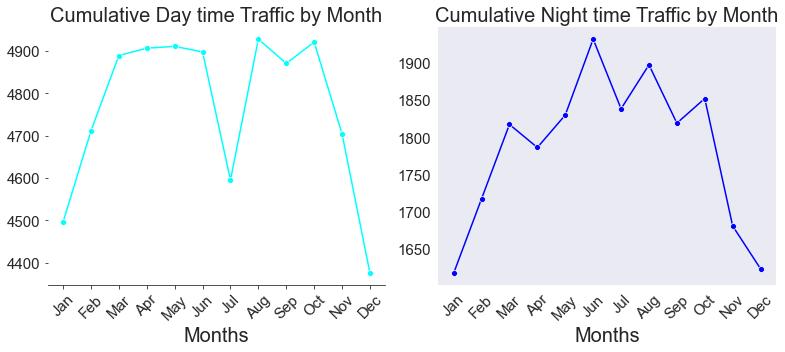

In [14]:
fig = plt.figure(figsize = (11,5))
style =["dark","white"]
#sns.set_style("white")
colors = ["cyan","blue"]
datas = [by_month_day,by_month_night]
time_of_day = ["Day","Night"]
tick_color = [None,"blue"]

#Plotting the graphs
for i in range(1,3):
    plt.subplot(1,2,i)
    sns.lineplot(data= datas[i-1]['traffic_volume'],
                 color= colors[i-1],marker='o')
    sns.despine(left= True)
    plt.title(label= "Cumulative {} time Traffic by Month".format(time_of_day[i-1]),
              fontsize= 20)
    plt.xlabel(xlabel= "Months",
               fontsize= 20)
    plt.ylabel(None)
    plt.xticks(ticks= by_month_day.index,
               labels= ['Jan','Feb','Mar','Apr',
                        'May','Jun','Jul','Aug',
                        'Sep','Oct','Nov','Dec'],
               size= 15,
               rotation= 45)
    plt.yticks(fontsize=15)
    sns.set_style(style[i-1])

# plt.subplots_adjust(left= 0.1,
#                     bottom= 0.1, 
#                     right= 0.9, 
#                     top= 0.9, 
#                     wspace= 0.5, 
#                     hspace= 0.4)
plt.tight_layout()
plt.show()

From Jan to Mar during the day there is a steady increase in traffic. This traffic trend continues to increase till June till there is a slump in July. The trend picks up again in August.

The night time traffic has a slightly different trend. While the volume of traffic is signficantly less than what is seen during the day, the Jan to Mar increase exists during the night as well. Between May and Oct the volume of traffic tends to fluctuate alternately with the traffic in June being the highest.

The day time traffic has an unusual trend in that the traffic in July slumps significantly. The reason behind the same could be the increase in temperature in July.

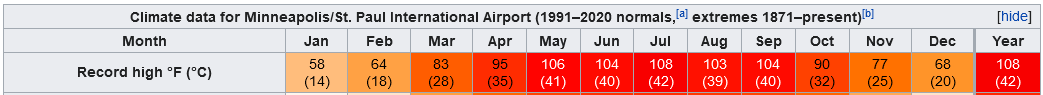

(Source: [Wikipedia](https://en.wikipedia.org/wiki/Climate_of_Minneapolis%E2%80%93Saint_Paul))

Later on we shall be verifying the impact of temperature on traffic. It is likely that this trend will show up there.

[Index](#Index)

# 6

## Its That Time of the Week...
**Traffic Volume over Days**

Now that we know the trend over the months, lets find out the trend fairs over the days of a week. To do this we will group the traffic volume over days and plot the same as we did earlier.

In [15]:
##Create a column to identify the day in each traffic record
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
nightime_data['dayofweek'] = nightime_data['date_time'].dt.dayofweek

#Group the day and night traffic data by month
by_dayofweek_day = daytime_data.groupby('dayofweek').mean().round(2)
by_dayofweek_night = nightime_data.groupby('dayofweek').mean().round(2)

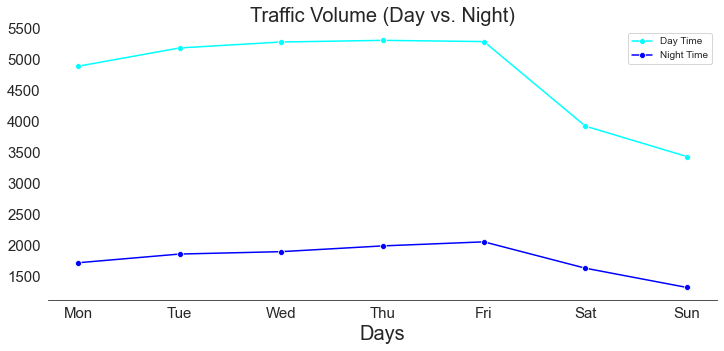

In [16]:
fig = plt.figure(figsize = (12,5))
sns.set_style("white")

#Plot the graph
sns.lineplot(data = by_dayofweek_day['traffic_volume'], label = 'Day Time',color = 'cyan',marker='o')
sns.lineplot(data = by_dayofweek_night['traffic_volume'], label = 'Night Time',color = 'blue',marker='o')

#Modify the view
sns.despine(left = True)
plt.title(label= "Traffic Volume (Day vs. Night)",
          fontsize= 20)
plt.xlabel(xlabel= "Days",
           fontsize= 20)
plt.ylabel(None)
plt.xticks(ticks = by_dayofweek_day.index,
           labels = ['Mon','Tue','Wed','Thu',
                    'Fri','Sat','Sun'],
           fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.show()

While the difference in traffic volume is wide in the case of daily traffic volume, what is noteable is that both day and night traffic decrease significantly over the weekend while they steadily increase on weekdays.

This finding leads us to verify, in more depth, the traffic during weekdays and weekends.

In [17]:
#Create a column for the hour of each traffic record
daytime_data['hour'] = daytime_data['date_time'].dt.hour
nightime_data['hour'] = nightime_data['date_time'].dt.hour

#Filter traffic data for daytime on weekdays and weekends
weekday_day = daytime_data[daytime_data.dayofweek <= 4].copy() #4 is Friday
weekend_day = daytime_data[daytime_data.dayofweek >= 5].copy() #5 is Saturday

#Filter traffic data for nighttime on weekdays and weekends
weekday_night = nightime_data[nightime_data.dayofweek <= 4].copy() 
weekend_night = nightime_data[nightime_data.dayofweek >= 5].copy() 

#Calculate the average traffic volume for day weekdays and weekends
by_hour_weekday_day = weekday_day.groupby('hour').mean().round(2)
by_hour_weekend_day = weekend_day.groupby('hour').mean().round(2)

#Calculate the average traffic volume for night weekdays and weekends
by_hour_weekday_night = weekday_night.groupby('hour').mean().round(2)
by_hour_weekend_night = weekend_night.groupby('hour').mean().round(2)

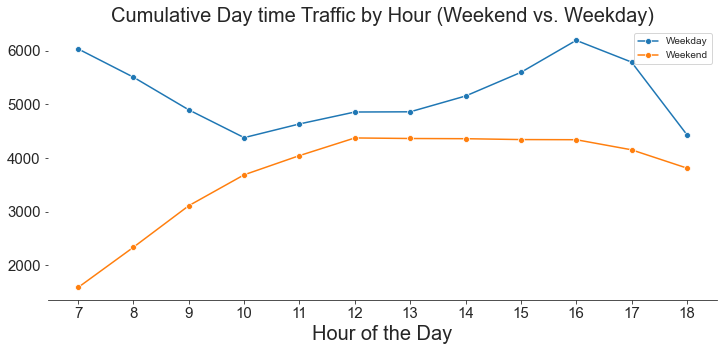

In [18]:
import numpy as np

#Plot the graphs
fig = plt.figure(figsize = (12,5))
sns.set_style("ticks")
sns.lineplot(data = by_hour_weekday_day['traffic_volume'],
             label = "Weekday", marker='o')
sns.lineplot(data = by_hour_weekend_day['traffic_volume'],
             label = "Weekend", marker = 'o')
sns.despine(left = True)

#Modify the view
plt.title(label = "Cumulative Day time Traffic by Hour (Weekend vs. Weekday)",
          fontsize = 20)
plt.xlabel(xlabel = "Hour of the Day", 
           fontsize = 20)
plt.ylabel(None)
plt.xticks(ticks = np.arange(7,19,1),
           fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Weekday traffic kicks off early at 7 AM and decreases by about 9AM. Its next peak is between 4PM and 5PM which is most likely the time at which people leave their work place.

Weekend traffic peaks by about 12 PM and the very gradually goes on the decline never reaching the peaks attained on the weekdays.

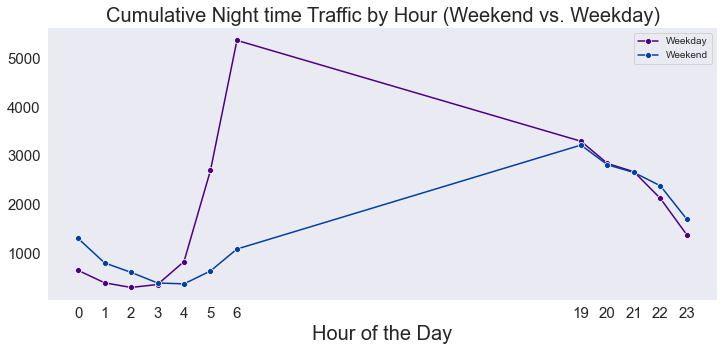

In [19]:
#Plot the graphs
fig = plt.figure(figsize = (12,5))
sns.set_style("dark")
sns.lineplot(data = by_hour_weekday_night['traffic_volume'],
             label = "Weekday", marker='o', color = '#4B0082')

sns.lineplot(data = by_hour_weekend_night['traffic_volume'],
             label = "Weekend", marker = 'o', color = '#003FA1')
sns.despine(left = True)

#Modify the view
plt.title(label = "Cumulative Night time Traffic by Hour (Weekend vs. Weekday)",
          fontsize = 20)
plt.xlabel(xlabel = "Hour of the Day", 
           fontsize = 20)
plt.ylabel(None)
plt.xticks(ticks = [0,1,2,3,4,5,6,19,20,21,22,23],
           fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

On both weekdays and weekends at 3 AM, 8 PM and 9 PM traffic is nearly the same. On weekdays, traffic reaches its peak just as the morning starts.

[Index](#Index)

# 7

## Cold or Sunny, Traffic isn't Funny
**Influence of weather on traffic**

Weather is likely to be a good indicator of traffic. It is expected that if the weather is bad, the traffic would be high and vice-versa. Following are the numerical columns provided. 

In [20]:
traffic_data[['temp','rain_1h','snow_1h','clouds_all']]

,temp,rain_1h,snow_1h,clouds_all
0,288.28,0.0,0.0,40
1,289.36,0.0,0.0,75
2,289.58,0.0,0.0,90
3,290.13,0.0,0.0,90
4,291.14,0.0,0.0,75
...,...,...,...,...
48199,283.45,0.0,0.0,75
48200,282.76,0.0,0.0,90
48201,282.73,0.0,0.0,90
48202,282.09,0.0,0.0,90


Using the numerical data associated to temperature, rainfall, snowfall and cloud coverage we should be able to find the correlation between traffic and the different weather conditions.

In [21]:
traffic_data.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

**None of the weather columns seem to show any significant correlation with traffic.** We should be able to plot and find out whether any of the columns are related to traffic.

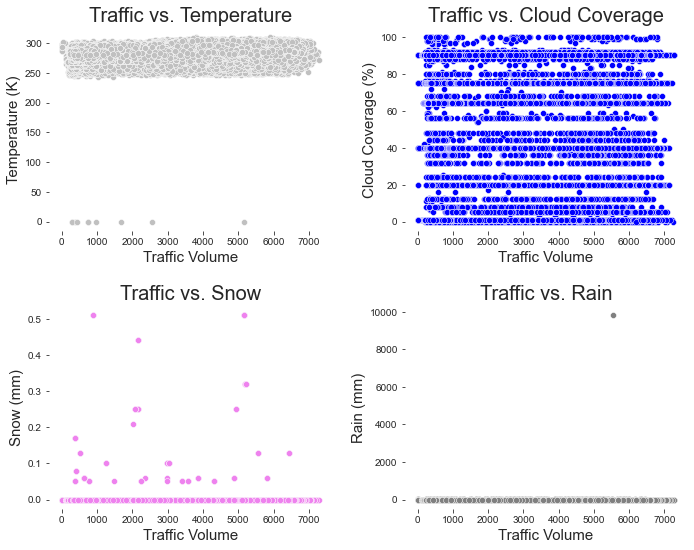

In [22]:
weather_columns = ['temp','clouds_all','snow_1h','rain_1h']
weather_names = ["Temperature","Cloud Coverage","Snow","Rain"]
colors = ["silver","blue","violet","grey"]
units = ["K","%","mm","mm"]

fig = plt.figure(figsize = (10,8))
for i in range(1,5):
    sns.set_style("ticks")
    plt.subplot(2,2,i)
    sns.scatterplot(data = traffic_data,
                    x = 'traffic_volume',y = weather_columns[i-1],
                    color = colors[i-1])
    sns.despine(left = True, bottom = True)
    plt.title(label = "Traffic vs. {}".format(weather_names[i-1]),
              fontsize=20)
    plt.xlabel(xlabel = "Traffic Volume",
           fontsize = 15)
    plt.ylabel(ylabel = "{} ({})".format(weather_names[i-1],units[i-1]),
           fontsize=15)

fig.tight_layout(pad = 2)
plt.show()

The results from the correlation have been reiterated in the plots above. **None of the weather conditions including temperature, cloud coverage, rain or snow seem to have any serious impacts on traffic.**

This requires that we revisit our earlier assumption that rise in temperature is the main cause of the traffic slump during July. This will be verified in a later section.

Lets verify whether the non-numerical weather columns have anything to reveal. The non-numerical columns include *weather_main* and *weather_description* . As was done earlier we could aggregate these columns and identify the mean traffic volumes based on the specific weather conditions.

In [23]:
#Calculate the average traffic based on identified columns
by_weather_main = daytime_data.groupby('weather_main').mean().reset_index()
by_weather_description = daytime_data.groupby('weather_description').mean().reset_index()

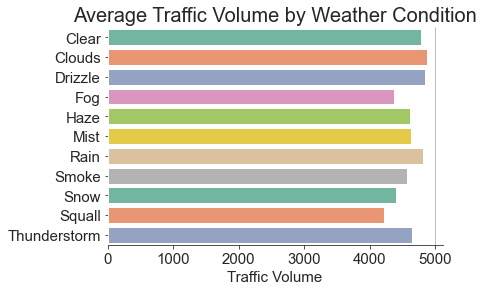

In [24]:
#Plot the graph
sns.barplot(data = by_weather_main, y = "weather_main", x = 'traffic_volume',
            palette = 'Set2',
            dodge = False)
sns.despine(left = True)
sns.set_style("ticks")

#Modify the viewb
plt.title(label = "Average Traffic Volume by Weather Condition",
          fontsize = 20)
plt.xlabel(xlabel = "Traffic Volume",
           fontsize = 15)
plt.ylabel(None)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.axvline(x=5000,
            color='grey',
            linewidth = 0.5)
plt.show()

Clearly , no specific weather condition seems to be a clear winner when it comes to creating huge traffic. A more detailed view of the weather condition for the day is given by the *weather_description* column which we shall verify next.

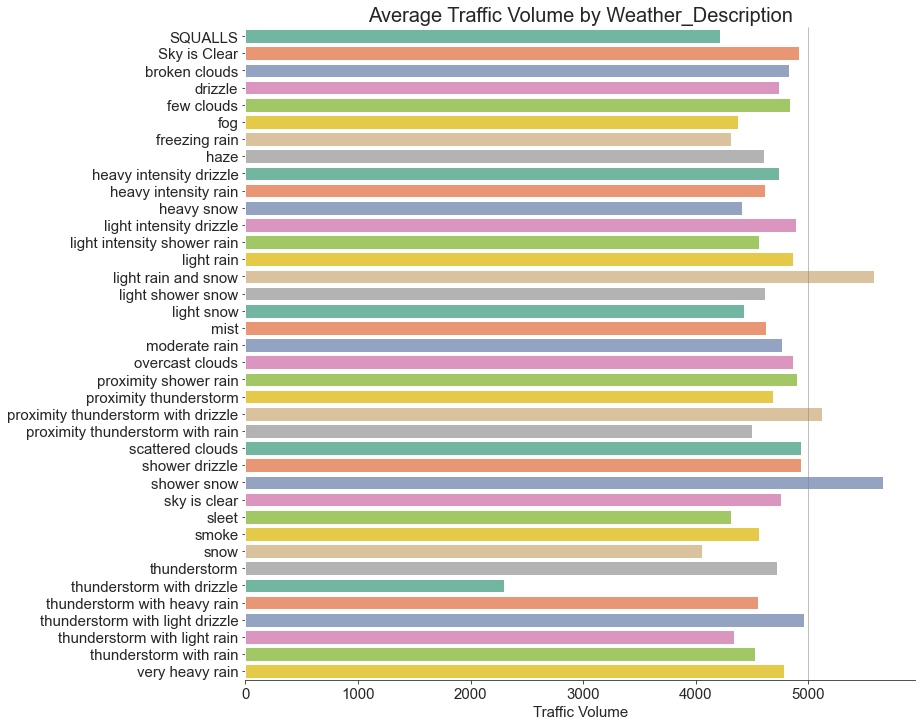

In [25]:
fig = plt.figure(figsize = (12,12))

#Plot the graph
sns.barplot(data = by_weather_description, y = "weather_description", x = 'traffic_volume',
            palette = 'Set2')
sns.despine(left = True)

#Modify the view
plt.title("Average Traffic Volume by Weather_Description", size = 20)
plt.xlabel(xlabel = "Traffic Volume",
           fontsize = 15)
plt.ylabel(None)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.axvline(x=5000,
            color='grey',
            linewidth = 0.5)
plt.show()

*light rain and snow*, *shower drizzle* and *proximity thunderstorm with drizzle* seem to be the conditions that cause traffic of more than 5000 vehicles.

[Index](#Index)

# 8

## Something About July...
**Analysing the Traffic Trend for July**

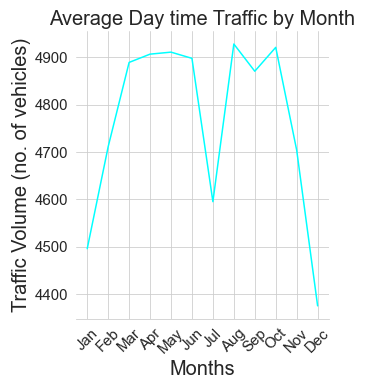

An earlier analysis revealed that traffic during July showed a significant slump. The assumption made was rising temperatures. However, as we found earlier the impact of temperature on traffic seems to be significantly less so this assumption is incorrect.

We could investigate this trend by finding out whether it is a constant throughtout all years.

In [26]:
#Filter traffic for July for every year in the dataset
july_traffic = daytime_data[daytime_data.month == 7].copy()
july_traffic_yearly = july_traffic.groupby(july_traffic.date_time.dt.year).mean().round(2)

In [27]:
daytime_data[daytime_data["date_time"].dt.year==2016]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
20351,None,264.16,0.0,0.0,1,Clear,sky is clear,2016-01-01 07:00:00,882,1,4,7
20352,None,264.80,0.0,0.0,75,Clouds,broken clouds,2016-01-01 08:00:00,1077,1,4,8
20353,None,265.76,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 09:00:00,1574,1,4,9
20354,None,267.61,0.0,0.0,40,Clouds,scattered clouds,2016-01-01 10:00:00,2059,1,4,10
20355,None,269.43,0.0,0.0,1,Clear,sky is clear,2016-01-01 12:00:00,3206,1,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
29640,None,268.90,0.0,0.0,5,Clear,sky is clear,2016-12-31 14:00:00,4571,12,5,14
29641,None,269.09,0.0,0.0,5,Clear,sky is clear,2016-12-31 15:00:00,4475,12,5,15
29642,None,269.09,0.0,0.0,1,Clear,sky is clear,2016-12-31 16:00:00,4777,12,5,16
29643,None,267.90,0.0,0.0,1,Clear,sky is clear,2016-12-31 17:00:00,4342,12,5,17


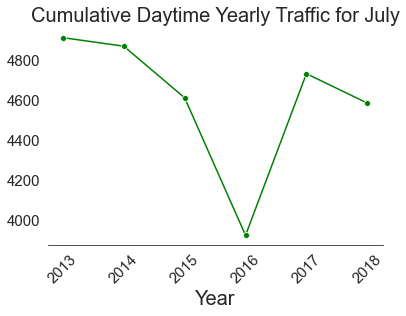

In [28]:
#Plot graph
sns.set_style("white")
sns.lineplot(data= july_traffic_yearly.traffic_volume,
             color= "green",marker='o')
sns.despine(left= True)

#Modify the view
plt.title(label= "Cumulative Daytime Yearly Traffic for July",
          fontsize= 20)
plt.xlabel(xlabel= "Year",
           fontsize= 20)
plt.ylabel(None)
plt.xticks(ticks= july_traffic_yearly.index,
           size= 15,
           rotation= 45)
plt.yticks(fontsize= 15)

plt.show()

This seems to be clearly something that was influenced by events in the year 2016.

In [29]:
july_traffic = daytime_data[(daytime_data.month == 7) & (daytime_data.date_time.dt.year == 2016)]
print(f'\033[1mAverage Weekly Traffic during July 2016:\033[0m\t')
july_traffic.groupby(july_traffic["date_time"].dt.isocalendar()['week']).mean().round(2)["traffic_volume"]

Average Weekly Traffic during July 2016:	


week
26    3574.19
27    3996.67
28    4483.15
29    3141.54
30    4275.13
Name: traffic_volume, dtype: float64

In [30]:
three_month_traffic = daytime_data[(daytime_data.month.isin([6,7,8])) & (daytime_data.date_time.dt.year == 2016)]
print(f'\033[1mAverage Weekly Traffic during June, July, August 2016:\033[0m\t')
three_month_traffic.groupby(three_month_traffic["date_time"].dt.isocalendar()['week']).mean().round(2)["traffic_volume"]

Average Weekly Traffic during June, July, August 2016:	


week
22    4932.06
23    4987.43
24    5200.83
25    4994.84
26    4321.22
27    3996.67
28    4483.15
29    3141.54
30    4275.13
31    4716.07
32    4476.87
33    4560.26
34    4490.38
35    4943.38
Name: traffic_volume, dtype: float64

In July 2016 traffic took a significant nose dive. On further investigation of the weeks of that month and a quick search we find that it was the month when:
- There were many [maintenance jobs](https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes) going on the I-94.
- [Philando Castile](https://minnesota.cbslocal.com/2017/06/14/timeline-philando-castile-jeronimo-yanez/) was shot dead by a police officer causing protests to erupt in the I-94

During the month there were many protests including one on 9th July when protestors shut traffic on the I-94.

[Index](Index)

# 9

## Conclusion

I-94 is an interstate highwayin the United States. In this project, we analysed the westward traffic for this highway to find out traffic indicators. While analyzing it was realized that there are missing entries for some of the days. Analysis was carried out with this in mind.

Through analysis we were able to identify that 
- Day time traffic is significantly higher than Night time Traffic
- Day time traffic is signifcant during Mar-Oct than the winter months of Nov-Feb
- Night time traffic tends to be greater in June and August
- Traffic is usually at its peak at 7AM and 4PM which are likely the times people are travelling to and from work respectively.
- Temperature, rainfall, snow or cloud coverage do not directly affect traffic volume
- Weather events specfically light rain and snow, shower drizzle and proximity thunderstorm with drizzle tend to get the traffic at its peak
- The death of Philando Castile had a signficant impact on traffic for the month of July 2016

[Index](#Index)